# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [162]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from random import random
import math
# from dcor import distance_correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [134]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    Cluster_Distances=[]
    Cluster_Centroids=np.array(Cluster_Centroids)
    for p in range(len(Data_points)):
        point=Data_points[p]
        arr=[]
        for c in range(len(Cluster_Centroids)):
            if(Cluster_Centroids.ndim==2):
                centroid=Cluster_Centroids[c,:]
                if(centroid.size!=0 and point.size!=0):
                    if(Distance_Type==0):
                        dist = np.linalg.norm(point - centroid)
                    elif(Distance_Type==1):
                        point=np.array(point)
                        centroid=np.array(centroid)
                        dist=pearsonr(point, centroid)[0]
                    
                    arr.append(dist)
        Cluster_Distances.append(arr)
        
    return np.array(Cluster_Distances)


In [133]:
a=np.array([3,7])
b=np.array([4,2])
print(pearsonr(a,b)[0])

-1.0


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [111]:
def Distortion(Data_points,Centroids,Number_of_Clusters,minIndices):
    distortion=[]
    for k in range((Number_of_Clusters)):
        
        square_arr = []
        for i in range(len(Data_points)):
            if (minIndices[i] == k):
                c_point = Centroids[minIndices[i]]
                point=Data_points[i]
                if (c_point.size!=0):
                    squ_dist = np.linalg.norm(point-c_point)
                    square_arr.append(squ_dist)
        square_arr=np.array(square_arr)
        
        
        sum_err=np.sum(square_arr)
        distortion.append(np.mean(sum_err))
     
    return np.array(distortion)
    

In [73]:
def Initial_Cetnroids(Data_points,Number_of_Clusters,distance_type):
    minInColumns = np.amin(Data_points, axis=0)
    maxInColumns = np.amax(Data_points, axis=0)

    final_Centroids=[]
    for i in range(10):
        Centroids = []
        for k in range(Number_of_Clusters): 
            c = minInColumns + (random() * (maxInColumns - minInColumns))
            Centroids.append(c)
        distances = GUC_Distance(Centroids, Data_points, distance_type)
        minIndices = np.argmin(distances, axis=1)
        distortion=Distortion(Data_points,Centroids,Number_of_Clusters,minIndices)
        if(np.isnan(np.sum(distortion))):
            distortion = np.nan_to_num(distortion)
        if(i==0):
            pre_distortion=np.sum(distortion)
            final_Centroids=Centroids
        if(np.sum(distortion)<=pre_distortion):
            final_Centroids=Centroids
        pre_distortion=np.sum(distortion)
    
    
    return final_Centroids

In [141]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    # write code for intial cluster heads here 
    
    #initialize centroids
    Centroids=Initial_Cetnroids(Data_points,Number_of_Clusters,Distance_Type)
    
    # write your your loop
    Final_Cluster_Distance = []
    msd_pre=np.array([])
    while True:
        
    
    #calculate mean square distances
        distances = GUC_Distance(Centroids, Data_points, Distance_Type)
        minIndices = np.argmin(distances, axis=1)
        msd = np.array(Distortion(Data_points,Centroids,Number_of_Clusters,minIndices))
        if(np.isnan(np.sum(msd))):
            msd = np.nan_to_num(msd)
    #update centroids
        Centroids=[]
        for k in range((Number_of_Clusters)):
            points_cluster = []
            for i in range(len(Data_points)):
                if (minIndices[i] == k):
                    points_cluster.append(Data_points[i])   
           
            
            points_cluster=np.array(points_cluster)
            a=np.mean(points_cluster, axis=0)
            if(np.isnan(np.sum(a))):
                minInColumns = np.amin(Data_points, axis=0)
                maxInColumns = np.amax(Data_points, axis=0)
                a = minInColumns + (random() * (maxInColumns - minInColumns))
            Centroids.append(a)
        
        
        
        msd_sum=np.sum(msd)
        msd_pre_sum=np.sum(msd_pre)
#         print("msd sum:",msd_sum)
#         print("msd_pre sum:",msd_pre_sum)
        if(math.isclose(msd_sum,msd_pre_sum,rel_tol=0.1)):
            break
        msd_pre=msd
        msd=np.array([])

        
    Cluster_Metric = np.sum(msd)
    minIndices=np.array([minIndices])
    Final_Cluster_Distance=np.concatenate((minIndices.T,Data_points), axis=1)

    return [Final_Cluster_Distance, Cluster_Metric, Centroids]      

In [109]:
n=np.array([[1,2],[np.nan]])
a=np.mean(n,axis=0)
print(np.isnan(np.sum(a)))

True


<ipython-input-109-3cb039b2df44>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  n=np.array([[1,2],[np.nan]])


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [8]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [9]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykbrgcm'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        target=(len(X[0])-1)
        for i in range(len(X[0])-1):
            plt.scatter(X[:,i],X[:,target],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            target=(len(X[0])-1)
            for k in range(len(X[0])-2):
                plt.scatter(X[X[:,0]==i,k+1],X[X[:,0]==i,target],c = color[i],alpha = alpha,s=s)
                plt.scatter(km[i][k],km[i][target-1],c = color[i], marker = 'x', s = 100)

[[0.   0.   1.   1.  ]
 [1.   3.05 3.2  3.  ]
 [0.   0.5  0.7  1.  ]
 [1.   3.4  3.1  3.  ]]
[0.  0.5]
[1.  0.7]


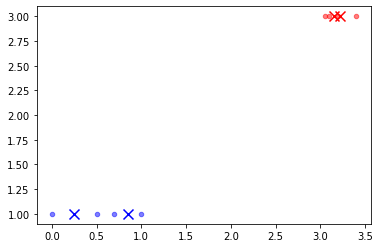

In [8]:
c = np.array([[5,4,6]])
p = np.array([[0,1,1],[3.05,3.2,3],[0.5,0.7,1],[3.4,3.1,3]])
[a,b,c]=GUC_Kmean(p,2,0)
print(a)
print(a[a[:,0]==0,1])
print(a[a[:,0]==0,2])
display_cluster(a,c,2)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

In [10]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

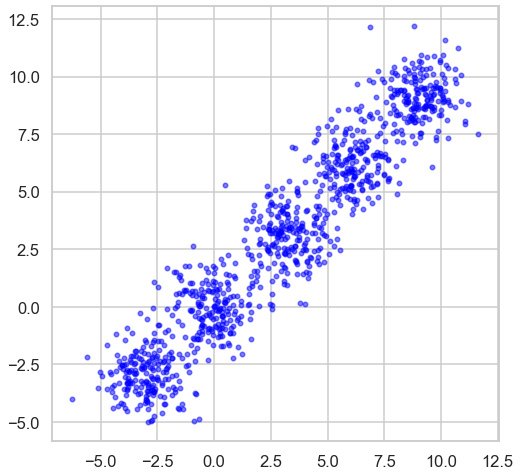

In [11]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

In [12]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Best Number of clusters to choose is :  9


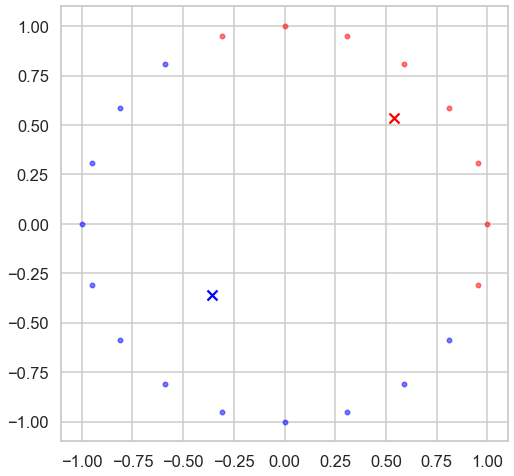

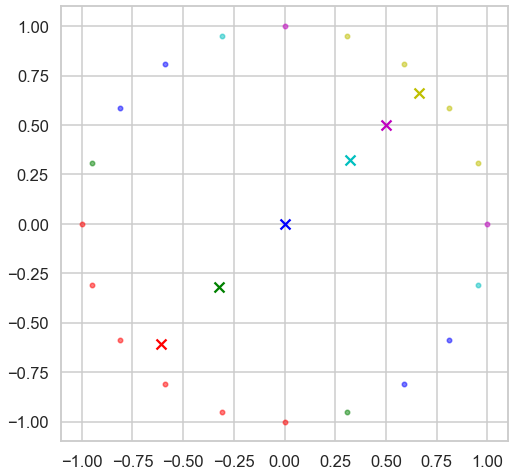

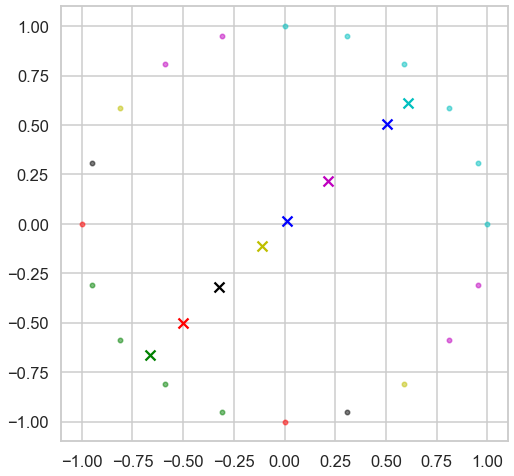

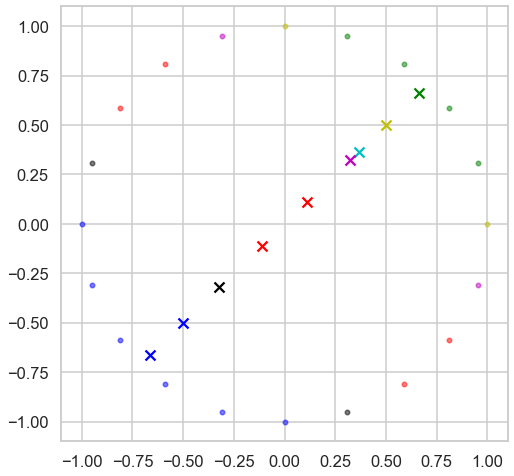

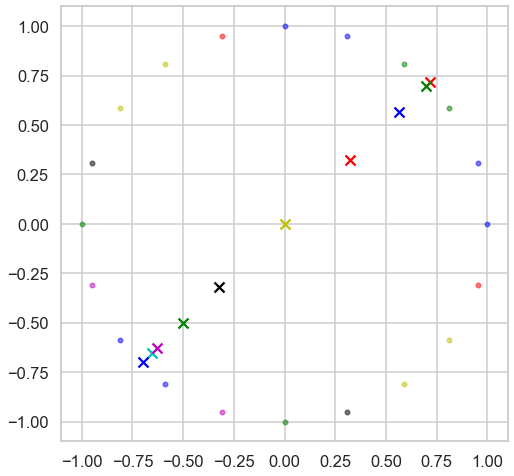

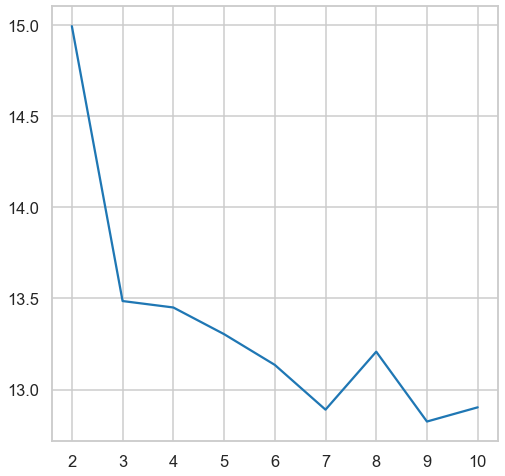

In [155]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
cluster_metric_pre=0
final_k=0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X1,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_metric_pre,rel_tol=0.1)):
        if(cluster_metric>cluster_metric_pre):
            final_k=i-1
        else:
            final_k=i
    cluster_metric_pre=cluster_metric
plt.plot(clusters,metric)
plt.show
print("Best Number of clusters to choose is : ",final_k)
 

Best Number of clusters to choose is :  10


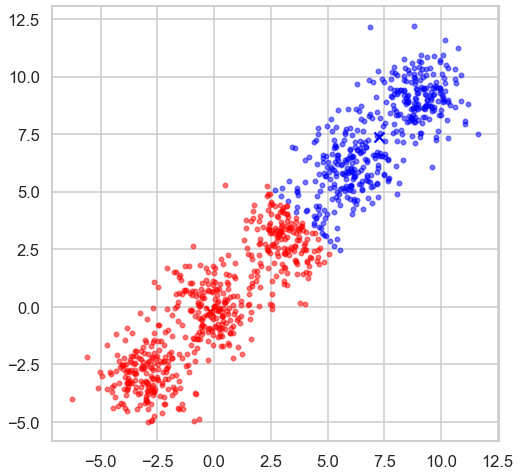

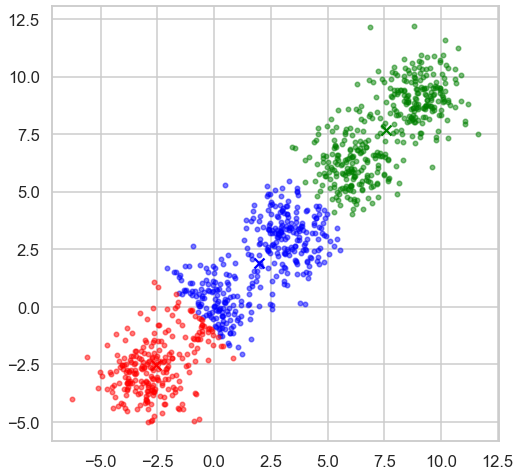

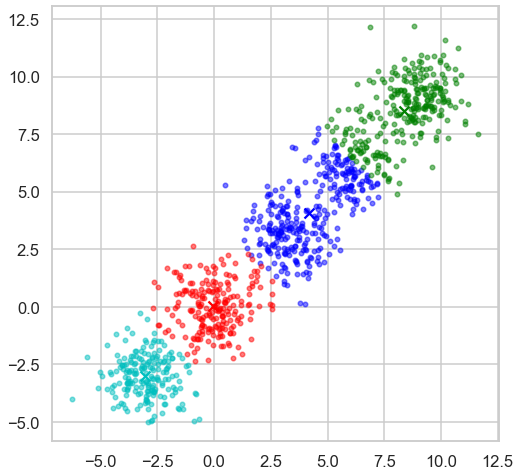

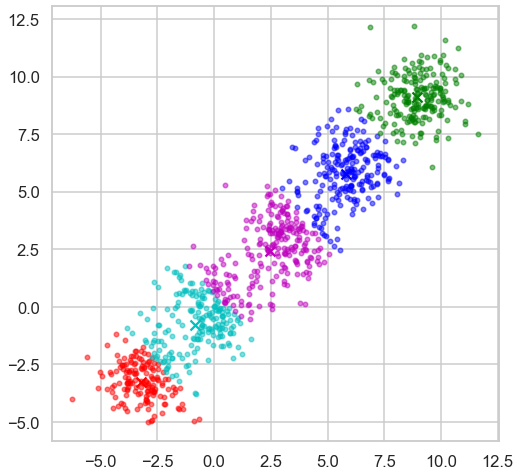

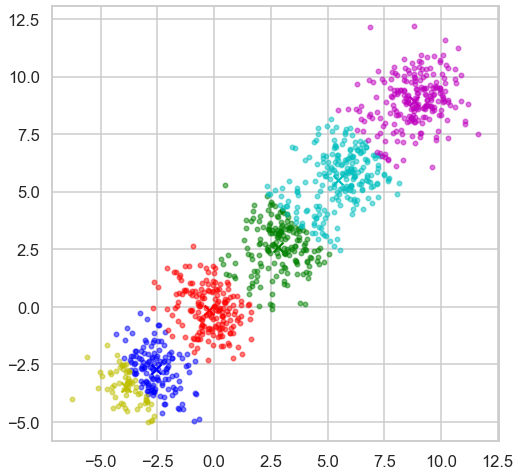

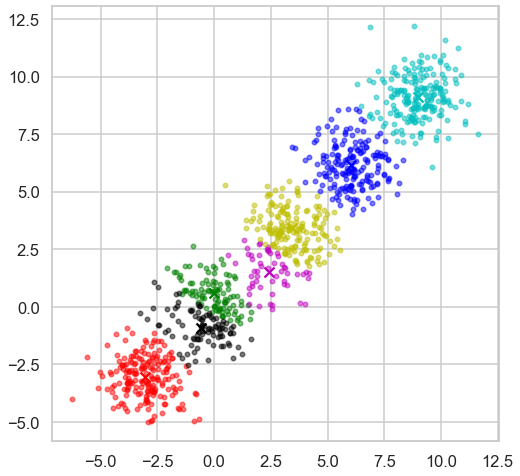

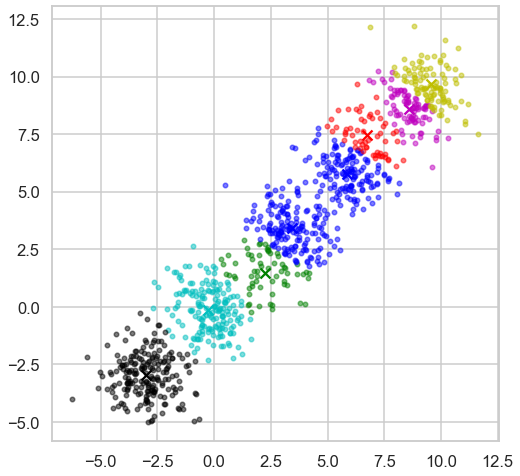

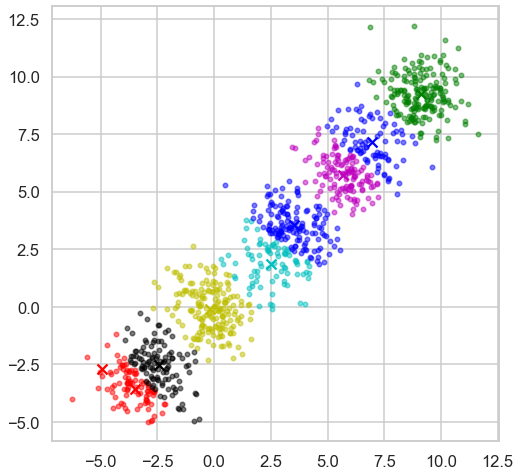

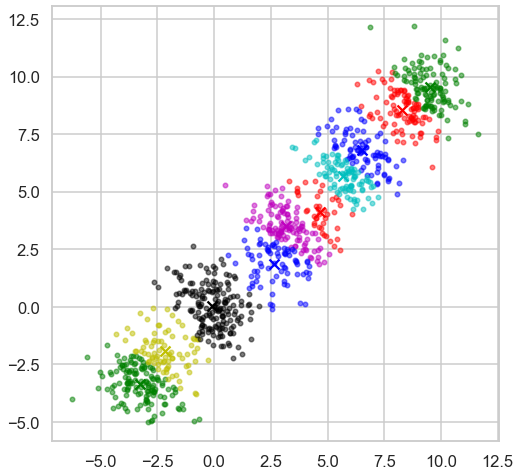

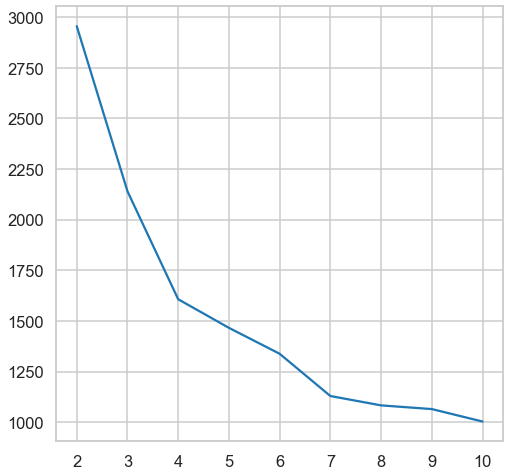

In [157]:

metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
cluster_metric_pre=0
final_k=0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X2,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_metric_pre,rel_tol=0.1)):
        if(cluster_metric>cluster_metric_pre):
            final_k=i-1
        else:
            final_k=i
    cluster_metric_pre=cluster_metric
plt.plot(clusters,metric)
plt.show
print("Best Number of clusters to choose is : ",final_k)

Best Number of clusters to choose is :  10


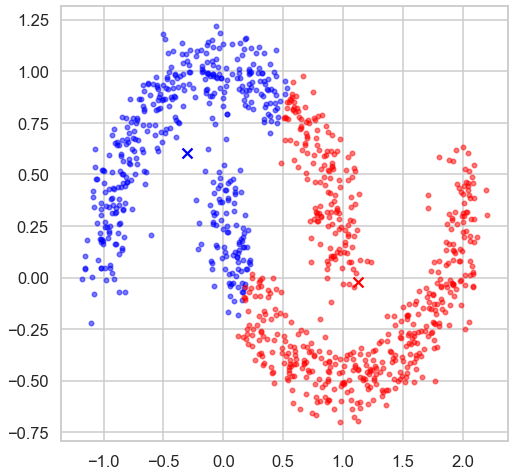

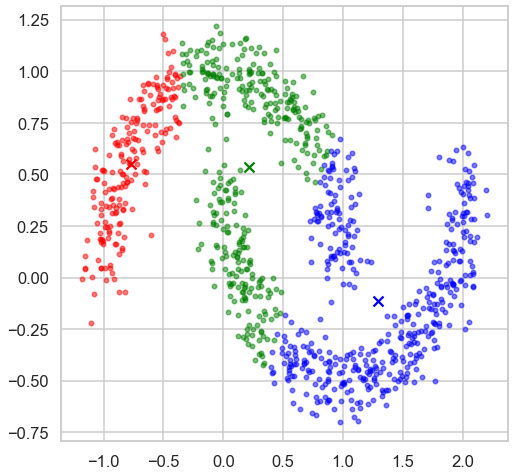

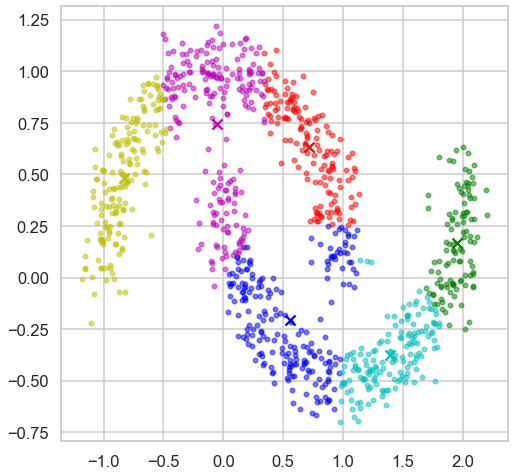

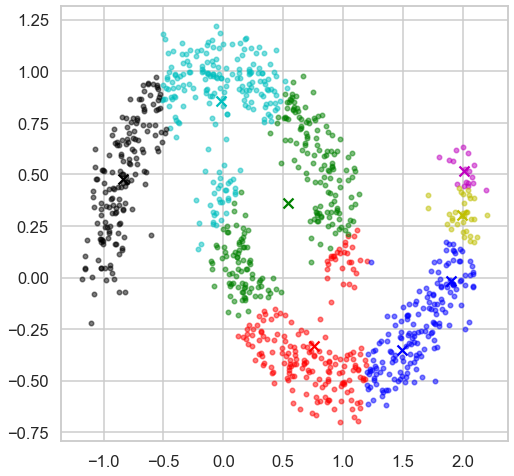

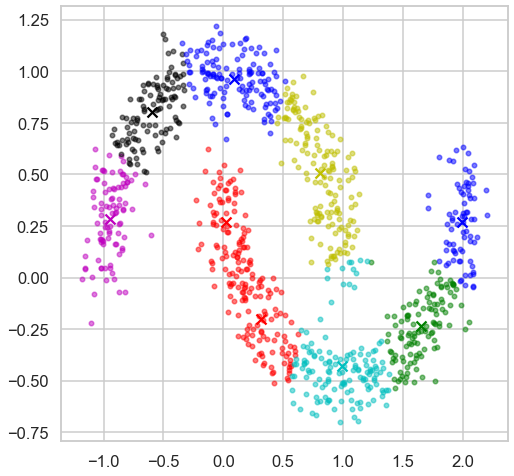

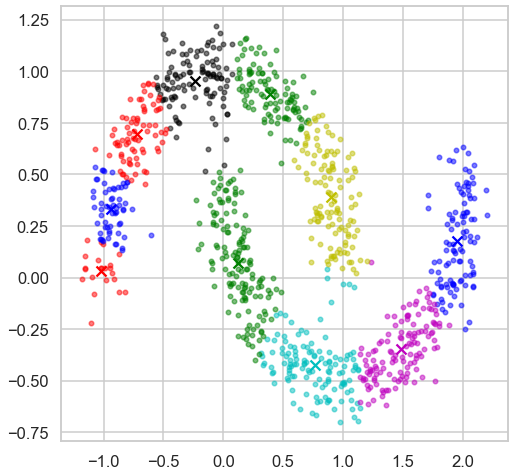

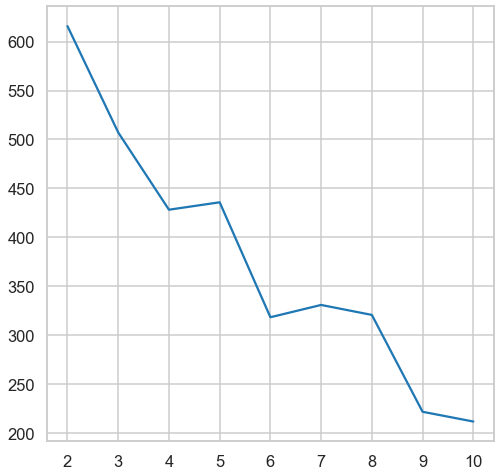

In [158]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
cluster_metric_pre=0
final_k=0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X3,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_metric_pre,rel_tol=0.1)):
        if(cluster_metric>cluster_metric_pre):
            final_k=i-1
        else:
            final_k=i
    cluster_metric_pre=cluster_metric
plt.plot(clusters,metric)
plt.show
print("Best Number of clusters to choose is : ",final_k)

# using Pearson distance correlation

<function matplotlib.pyplot.show(close=None, block=None)>

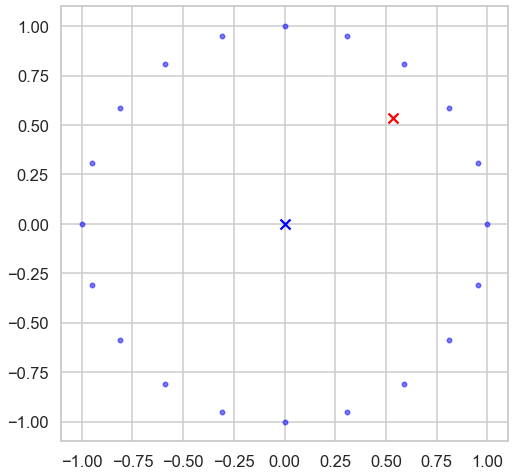

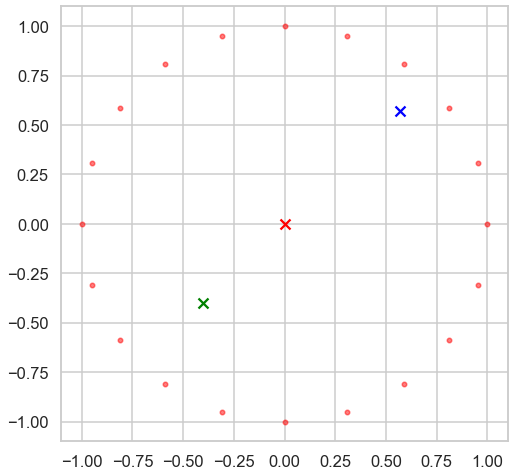

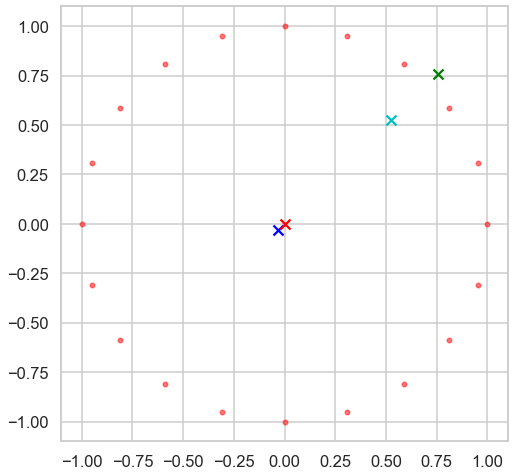

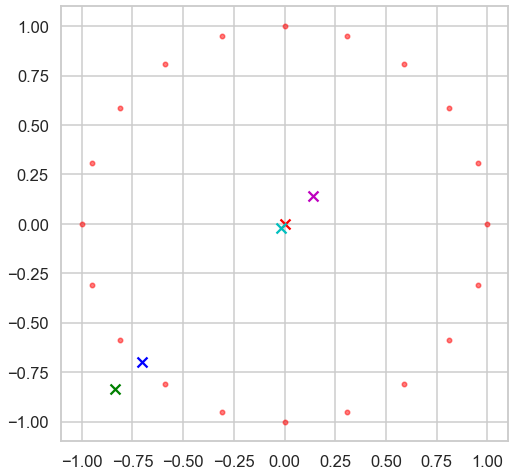

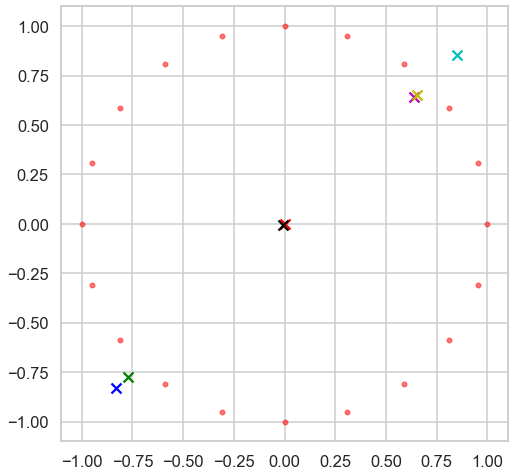

In [142]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X1,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
plt.plot(clusters,metric)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

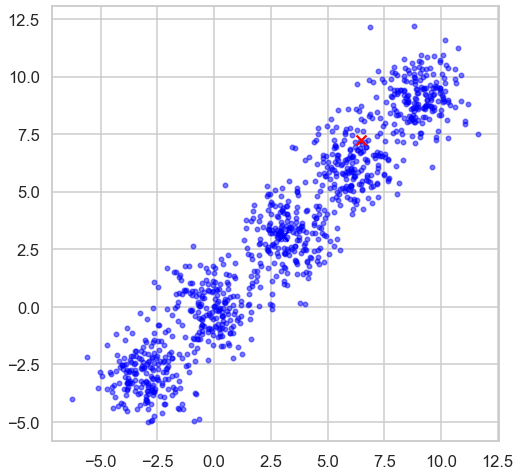

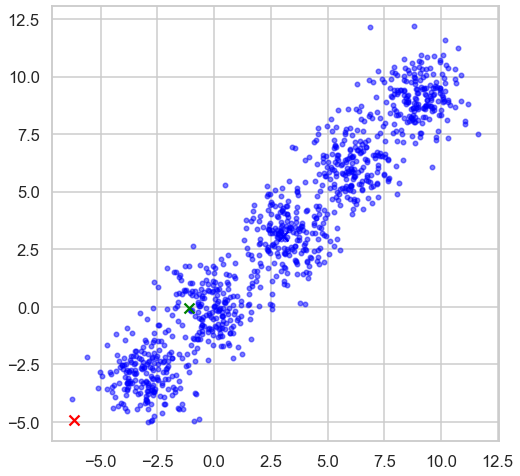

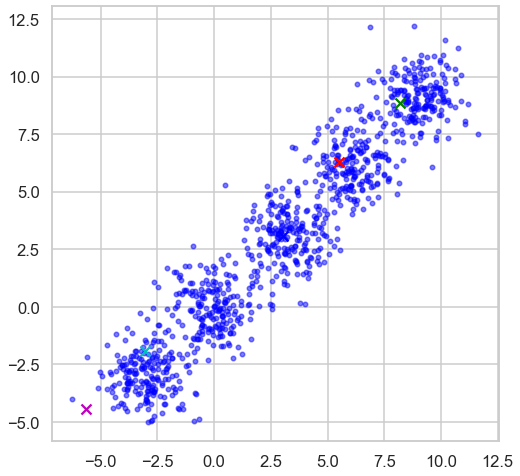

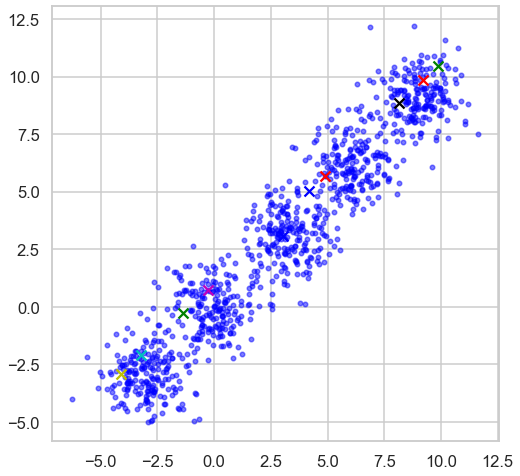

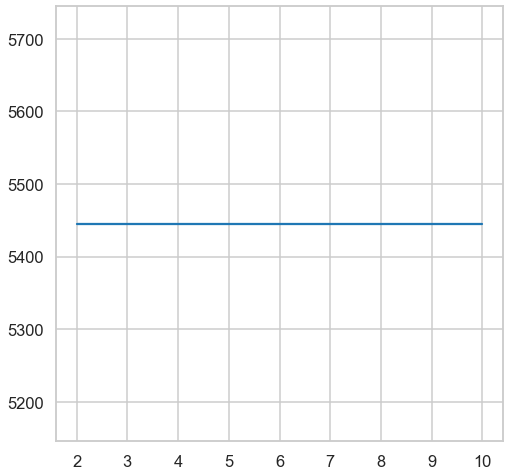

In [143]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X2,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
plt.plot(clusters,metric)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

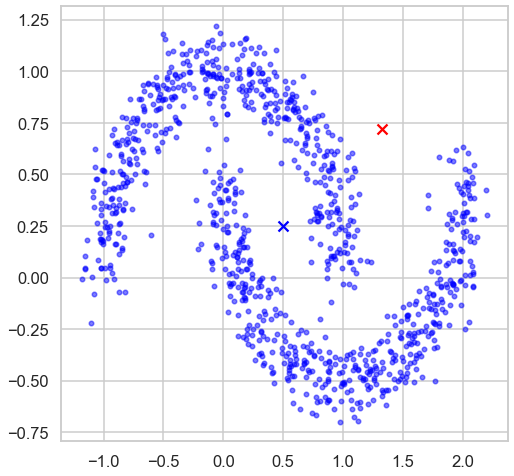

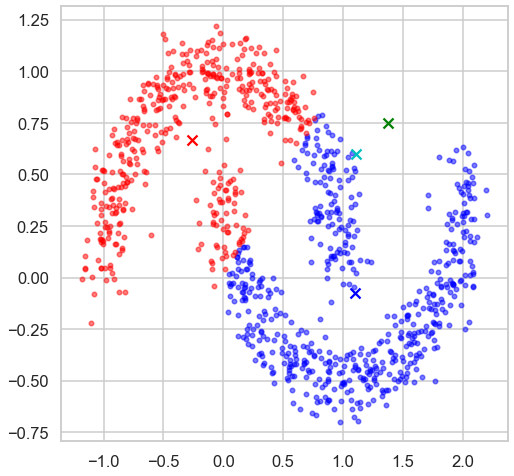

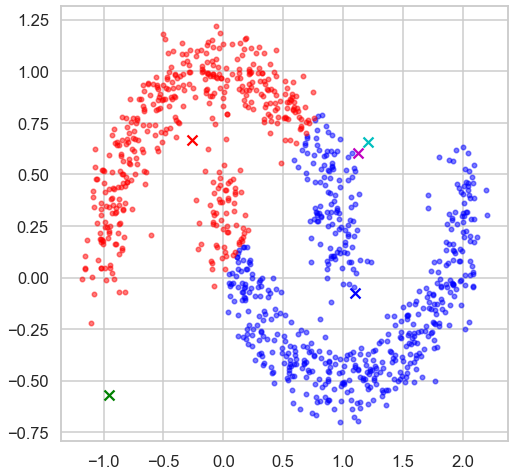

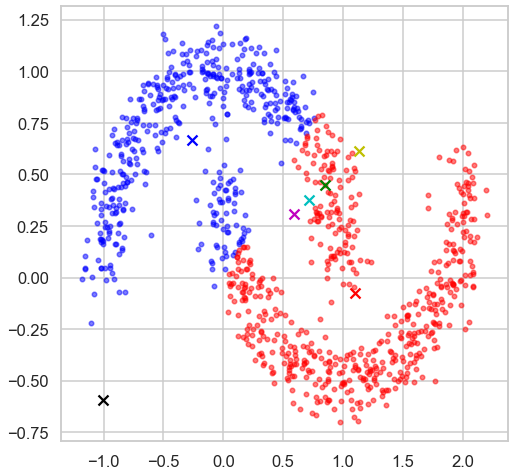

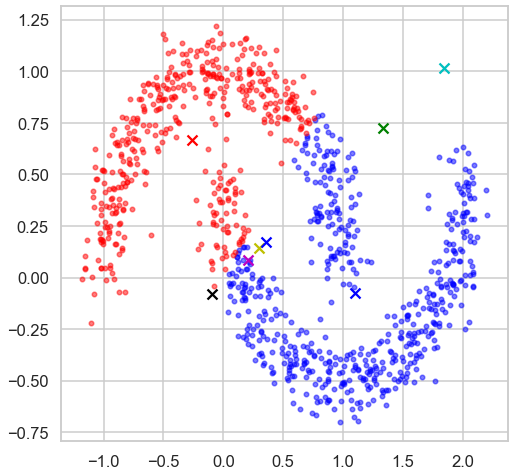

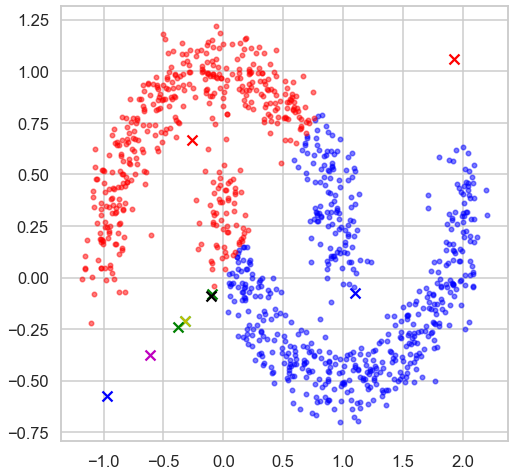

In [144]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X3,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
plt.plot(clusters,metric)
plt.show

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [164]:
data = pd.read_csv('Customer data.csv')
data.drop('ID',inplace=True,axis=1)



clusters=[2,3,4,5,6,7,8,9,10]
data.head()
scaler = MinMaxScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()
np.round(df_scaled,2)
data_array=df_scaled.to_numpy()

Best Number of clusters to choose is :  10


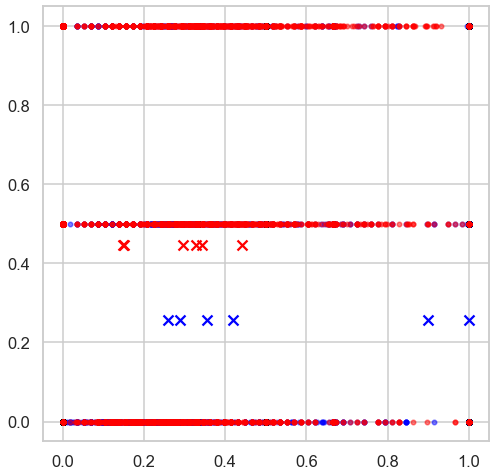

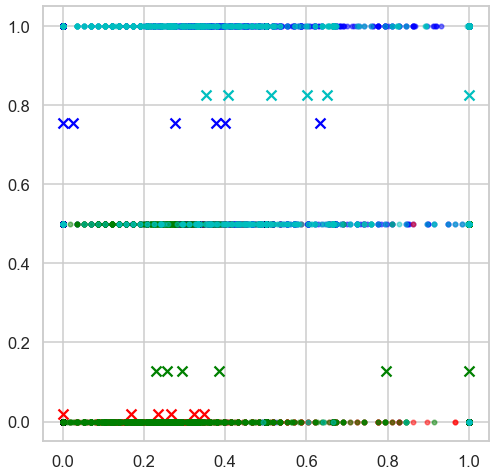

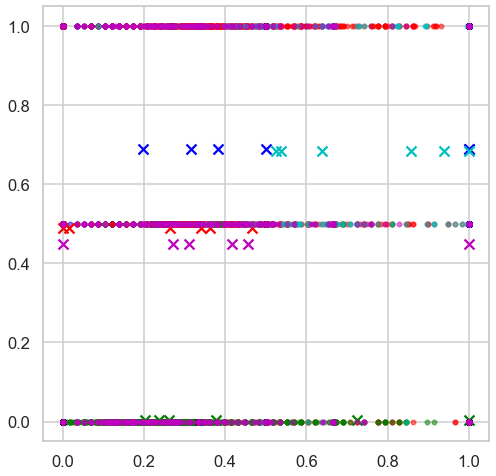

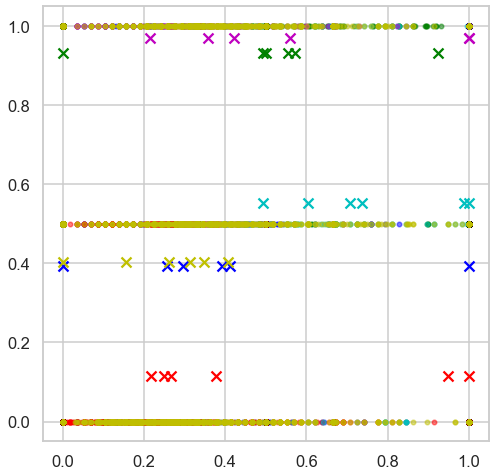

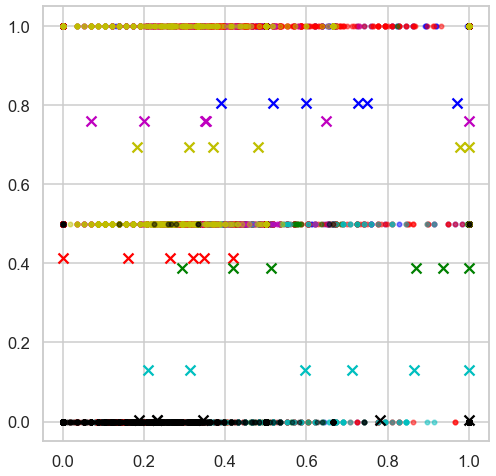

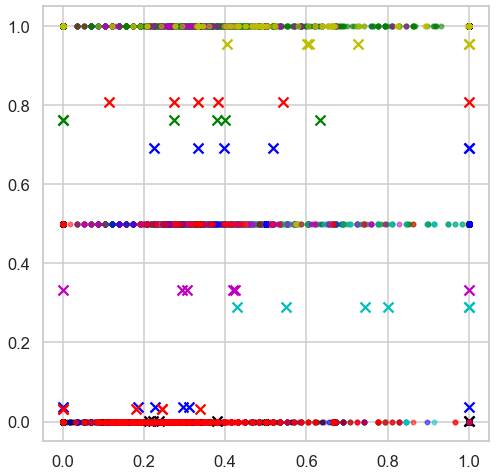

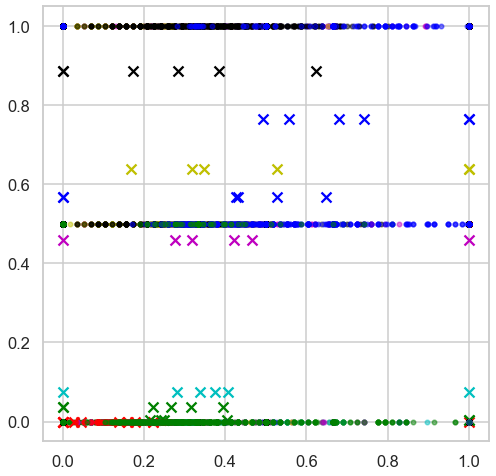

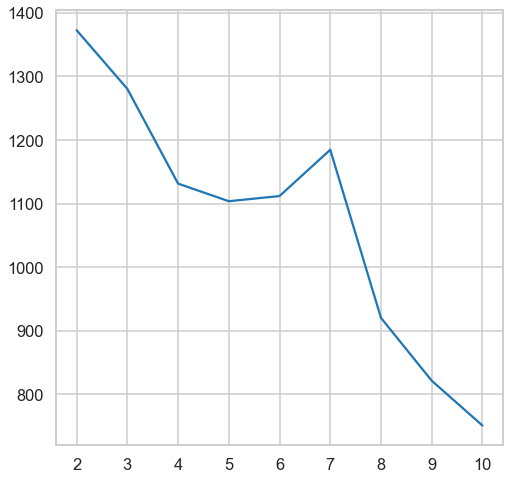

In [168]:
metric=[]
cluster_metric_pre=0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(data_array,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_metric_pre,rel_tol=0.1)):
        if(cluster_metric>cluster_metric_pre):
            final_k=i-1
        else:
            final_k=i
    cluster_metric_pre=cluster_metric
plt.plot(clusters,metric)
plt.show
print("Best Number of clusters to choose is : ",final_k)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


Best Number of clusters to choose is :  9


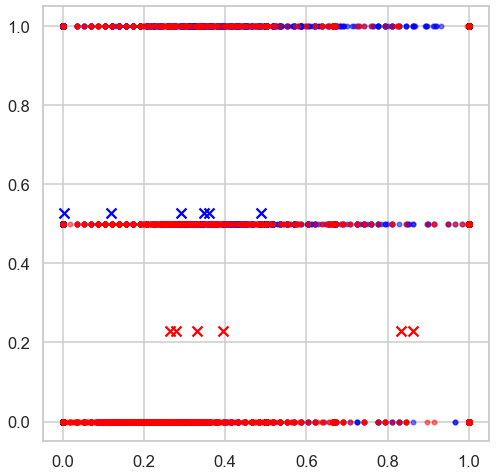

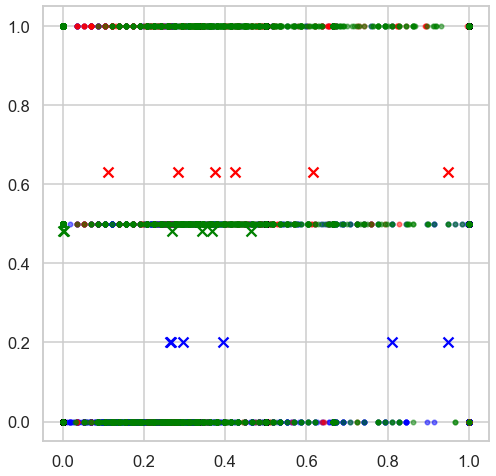

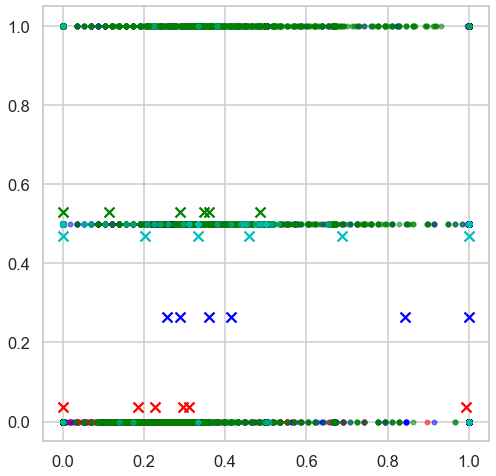

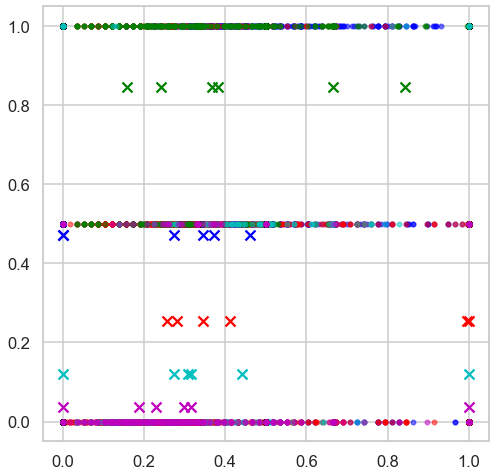

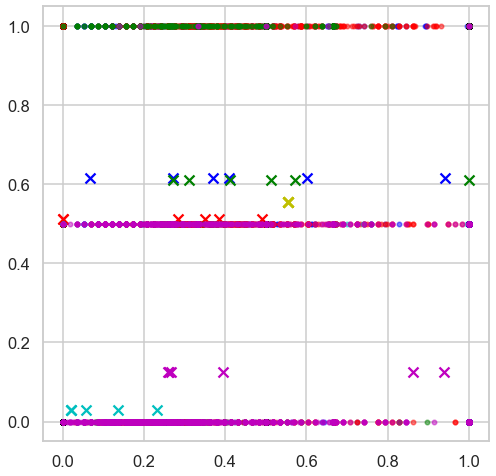

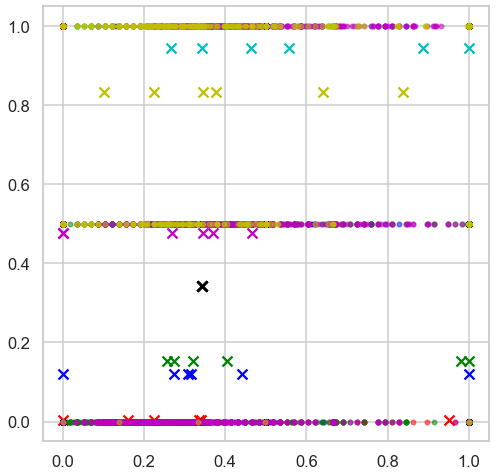

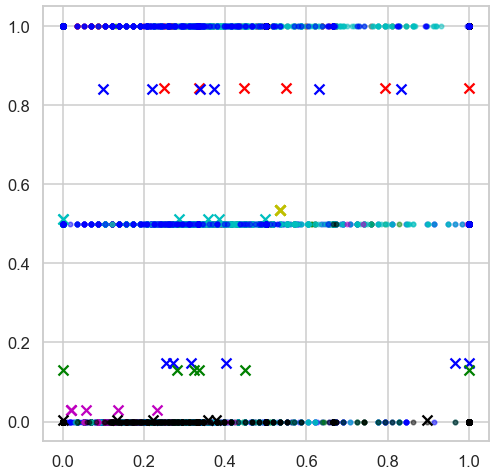

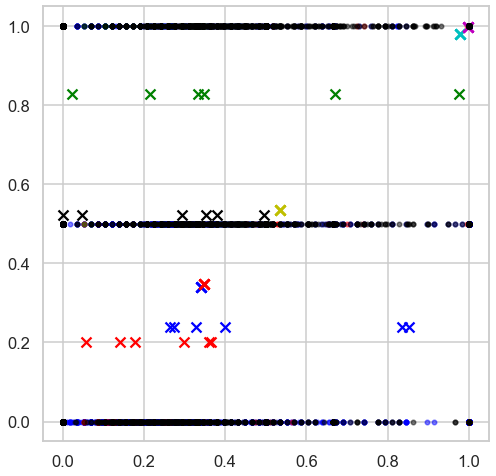

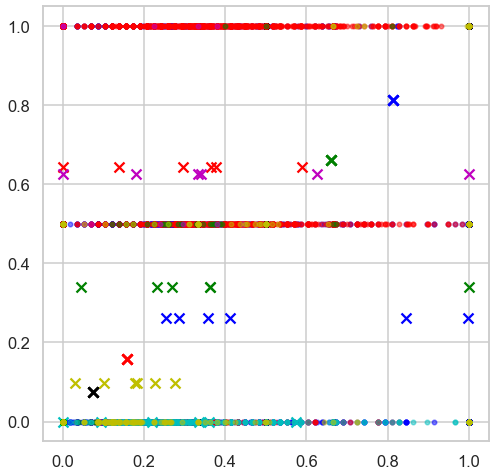

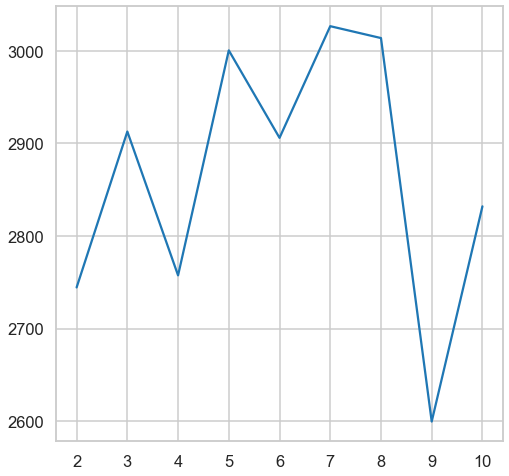

In [167]:
metric=[]
clusters=[2,3,4,5,6,7,8,9,10]
cluster_metric_pre=0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(data_array,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_metric_pre,rel_tol=0.1)):
        if(cluster_metric>cluster_metric_pre):
            final_k=i-1
        else:
            final_k=i
    cluster_metric_pre=cluster_metric
plt.plot(clusters,metric)
plt.show
print("Best Number of clusters to choose is : ",final_k)